<a href="https://colab.research.google.com/github/AliButt104/A1.1/blob/main/Copy_of_Copy_of_Regression_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Course: Data Science for Decision Support**
**Assignment 1.2** (Submission deadline 1.06.2022, 16:00), 

**Author:** Ali, Butt: 533126.


---




# Problem: **Regression** (Total score 32)

# **`Task 1 „Data Pre-processing“ (7 Scores)`**

1)	Read the data from your individual variant into Python notebook

In [4]:
import pandas as pand
url = 'https://raw.githubusercontent.com/AliButt104/A1.1/main/concrete.csv'
daf = pand.read_csv(url)
daf


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
#add more cell if needed to each code cell

2) Output the main information (number of variables, number of instances). 

In [6]:
daf.shape

(1030, 9)

*Comment the results of the previous program*

3) Output some first rows of the dataset. 


In [8]:
daf.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


4) Make explanatory data analyses for each variable (mean, std, etc.).

In [9]:
print(daf.mean()) 

cement          281.167864
slag             73.895825
ash              54.188350
water           181.567282
superplastic      6.204660
coarseagg       972.918932
fineagg         773.580485
age              45.662136
strength         35.817961
dtype: float64


In [10]:
print(daf.std())

cement          104.506364
slag             86.279342
ash              63.997004
water            21.354219
superplastic      5.973841
coarseagg        77.753954
fineagg          80.175980
age              63.169912
strength         16.705742
dtype: float64


*Comment the results of the previous program* 

5) Look at the independent and dependent variables. Divide the dataset accordingly into matrices X and Y. Output the shapes of these matrices. 

In [11]:
X = daf.iloc[:, :-1].values
X.shape
Y = daf.iloc[:, -1].values
Y.shape

(1030,)

*Comment the results of the previous program* 

6) Look at data types of the variables. Are there any categorical variable you need to encode? Execute necessary transformations. Drop some columns if necessary, when recommended in your individual variant.

In [ ]:
no, there is no categorical possible

7) Are there any Nan values? Try different filling of them (mean, median).

In [12]:

daf.isnull().values.any()

False

*Comment the results of the previous program* 

8) Check the dependences between each of the independent variable and the target variable and among the independent variables.  Output correlation table and corresponding headmap results.

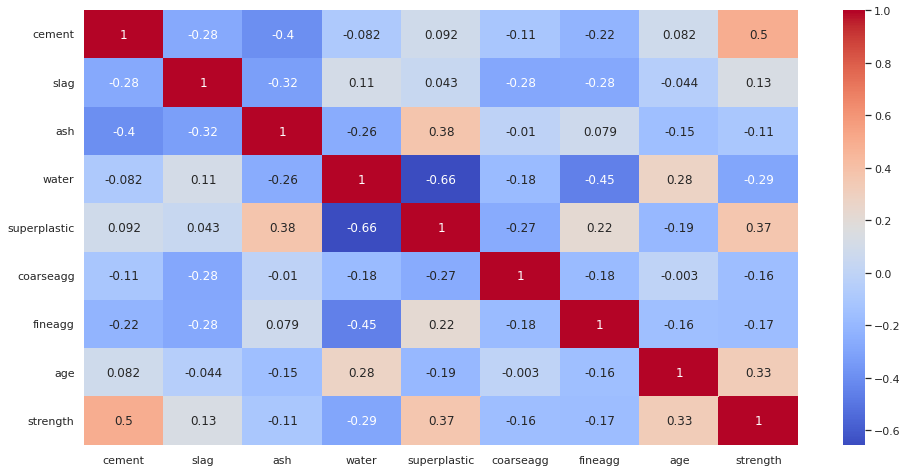

In [13]:
import seaborn as sbn
daf.corr()
sbn.set(rc = {'figure.figsize':(16,8)})
sbn.heatmap(daf.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

*Comment the results of the previous program* 

9) `Build 2D plots of dependences between each pair of the varibles.`

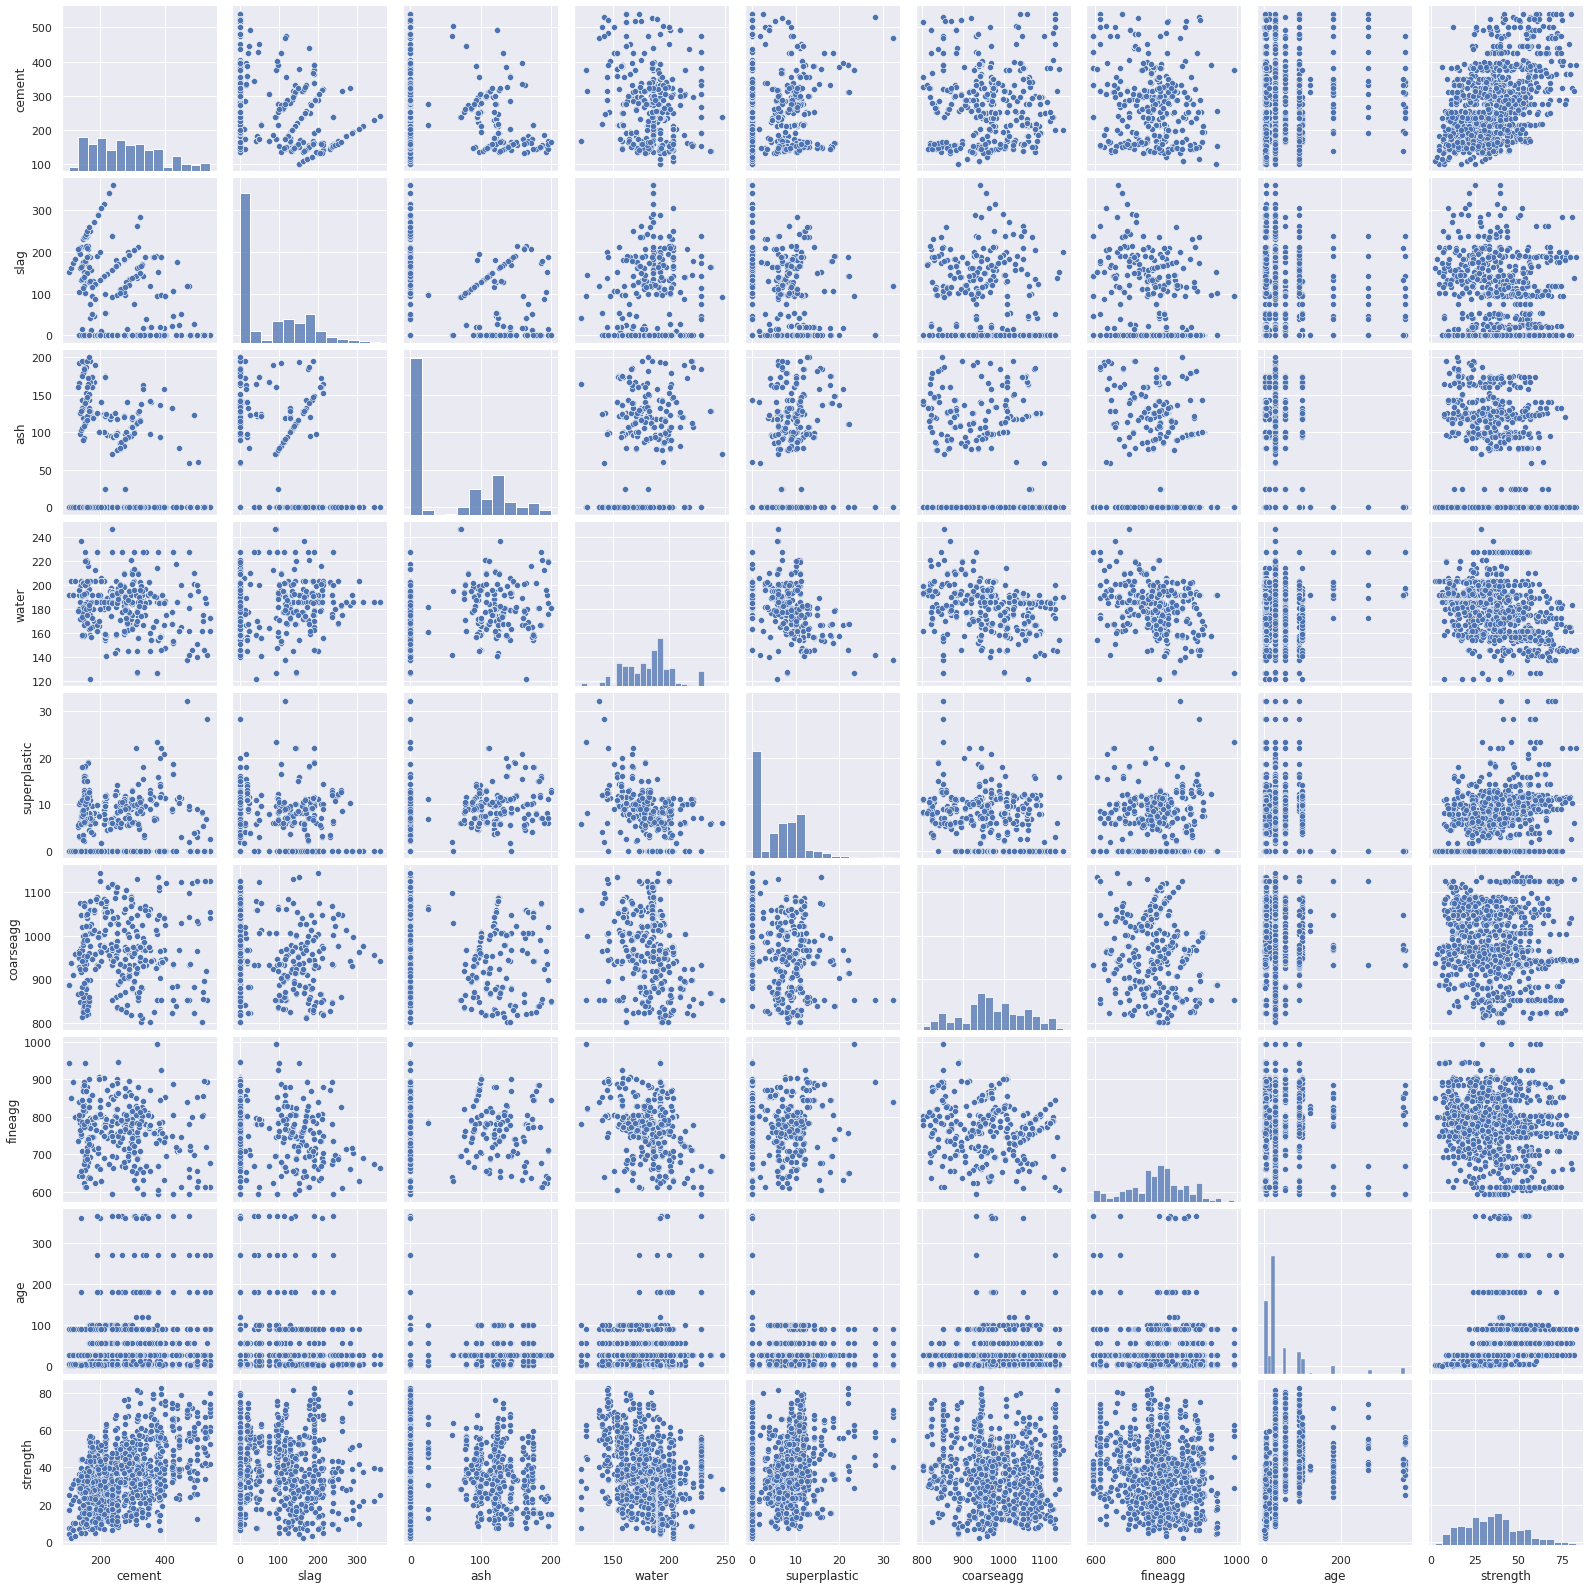

In [14]:
sbn.pairplot(daf)

*Comment the results of the previous program* 

# **`Task 2 “Data Analysis” (7 Scores)`**

Compare 4 ML methods: 

*   Linear regression
*   Decision tree regression
*   kNN: k nearest neighbours regression
*   Support vector machine regression


1) Scale your whole dataset. Try different scalings for your dataset. (Standard Scaler, MinMax Scaler). Experiment with Standard Scaler first.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
stc=StandardScaler()
X = daf.iloc[:, :-1].values
y = daf.iloc[:, -1].values
X = stc.fit_transform(X)

2) Divide your dataset into 2 parts: training set and testing set (90:10). Use defined random_state to reproduce the splitting for other Scaler. Output the dimension of the resulting datasets.

In [17]:
import numpy as nup
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(927, 8) (103, 8) (927,) (103,)


3) **Preliminary analysis:** For each model: train with training set and output the regression score (R2) of the model using training set. Now test your model with a testset and output the regression score (R2). Compare R2 inside one model for training and testing sets. Calculate other metrics MSE, RMSE, MAE, mentioned in the corresponding lecture. Compare the same characteristics calculated with training and testsets. 

**Linear model**

In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



reg_all = LinearRegression()
reg_all.fit(X_train,y_train)

print(reg_all.coef_)
print(reg_all.predict([[0,0.530,	0.420,	0.135,	0.6770,	0.2565,	0.1415,	0.2100	]]))
y_pred = reg_all.predict(X_test)
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = nup.sqrt(mean_squared_error(y_test, y_pred))
MSE = nup.square(nup.subtract(y_test,y_pred)).mean()
MAE=mean_absolute_error(y_test, y_pred)
print("Root Mean Squared Error: {}".format(rmse))
print("MSE: {}".format(MSE))
print("MAE: {}".format(MAE))

[12.34301679  9.07940587  5.36788893 -3.13749276  1.86217773  1.41272654
  1.5811009   7.24390706]
[45.86363498]
R^2: 0.6196312800273649
Root Mean Squared Error: 10.05737135566359
MSE: 101.15071858572249
MAE: 7.924624264171238


*Comment the results of the previous program*. *Compare the results of the same characteristics for training and test sets. Make conclusions.*

**Decision tree regression**

In [19]:
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X, y)

y_pred = regr_1.predict(X_test)
print(regr_1.predict([[0,0.350,	0.265,	0.090,	0.2255,	0.0995,	0.0485,	0.0700]]))
print("R^2: {}".format(regr_1.score(X_test, y_test)))
rmse = nup.sqrt(mean_squared_error(y_test, y_pred))
MSE = nup.square(nup.subtract(y_test,y_pred)).mean()
MAE=mean_absolute_error(y_test, y_pred)
print("Root Mean Squared Error: {}".format(rmse))
print("MSE: {}".format(MSE))
print("MAE: {}".format(MAE))

[36.9502011]
R^2: 0.5169856615154671
Root Mean Squared Error: 11.333449145752063
MSE: 128.44706953934815
MAE: 8.973080616395267


*Comment the results of the previous program*. *Compare the results of the same characteristics for training and test sets. Make conclusions.*

**kNN: k nearest neighbours regression**

In [20]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X, y)

y_pred = neigh.predict(X_test)
print("R^2: {}".format(neigh.score(X_test, y_test)))
rmse = nup.sqrt(mean_squared_error(y_test, y_pred))
MSE = nup.square(nup.subtract(y_test,y_pred)).mean()
MAE=mean_absolute_error(y_test, y_pred)
print("Root Mean Squared Error: {}".format(rmse))
print("MSE: {}".format(MSE))
print("MAE: {}".format(MAE))

R^2: 0.9419215670224583
Root Mean Squared Error: 3.929972701800001
MSE: 15.444685436893199
MAE: 2.789708737864078


*Comment the results of the previous program*. *Compare the results of the same characteristics for training and test sets. Make conclusions.*

**Support vector machine regression**

In [30]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X, y)

y_pred = clf.predict(X_test)
print("R^2: {}".format(clf.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
MSE = np.square(np.subtract(y_test,y_pred)).mean()
MAE=mean_absolute_error(y_test, y_pred)
print("Root Mean Squared Error: {}".format(rmse))
print("MSE: {}".format(MSE))
print("MAE: {}".format(MAE))

ValueError: ignored

*Comment the results of the previous program*. *Compare the results of the same characteristics for training and test sets. Make conclusions.*

Output the coefficients of the linear regression model. Which variables have the biggest influence on the output (dependent variables)? Write the conclusions in the notebook as a text field.

In [31]:
print(reg_all.coef_)

[12.34301679  9.07940587  5.36788893 -3.13749276  1.86217773  1.41272654
  1.5811009   7.24390706]


*Comment the results of the previous program.*

4) Recalculate the results of Task 2 (use the same random_state as for Standard Scaler by splitting) with MinMaxScaler and compare the results based on metric R2. Use the Scaler, which gives the best results for the next Tasks.

In [ ]:
#Write your code here

*Comment the results of the previous program.*

# **`Task 3 “Cross validation” (10 Scores)`**

1)	Make 5 fold cross validation, dividing your combined (training + validation sets) into 5 folds in different combinations manually with the function train_test_split() and  without using such functions as: cross_val_score(), cross_validation(), GridSearchCV(). Execute a cycle for each fold running all four models inside.

2) Find the average values for each metric for each model based on the validation set. 

3) Try different values for the hyperparameters (see corresponding lecture slides) for each model and re-run the steps 1-2. Make conclusions about the best model and best parameters, based on each metrics and based on the majority of the metrics. 



In [ ]:
#Write your code here

*Show the results of 3 runs of each model with different hyperparameters each.*

4)	**Final evaluation.** Evaluate your model using a test set (remains the same from the previous task) based on all metrics. Take the best hyperparameters of the models from the cross validation step and train the model with the complete training set (training set + validation set). Compare the results obtained on the validation set. Make the conclusions about the results.

In [ ]:
# Write your code here

# **`Task 4 “Use automatic cross validation ” (10 Scores)`**

1) Use the functions cross_val_score() or cross_validation() for automation of the manually performed process in Task 3. Use the best hyperparameter values for each model found at the previous step.

In [ ]:
#Write your code here for Lenear regression

In [ ]:
#Write your code here for Decision tree regression

In [ ]:
#Write your code here for #kNN: k nearest neighbours regression

In [ ]:
#Support vector machine regression

*!! Comment the obtained results here !!*

2) Use the function GridSearchCV() to find the best hyperparameters for each ML method.

In [ ]:
#Write your code here for Linear regression

In [ ]:
#Write your code here for Decision tree regression

In [ ]:
#Write your code here for #kNN: k nearest neighbours regression

In [ ]:
#Write your code here for Support vector machine regression

*!! Comment the obtained results here !!*

3) Evaluate the found models and parameters with the test dataset. Compare the results of Tasks 3 and Task4. Make conclusion about the results.

In [ ]:
#Write your code here Linear regression

In [ ]:
#Write your code here for Decision tree regression

In [ ]:
#Write your code here for #kNN: k nearest neighbours regression

In [ ]:
#Write your code here for Support vector machine regression

*!! Comment the obtained results here !!*

4) Output residuals (true value - forecast) and order them. Which observations could be outliers?  Compare the outliers of all the models. Are they the same? 

In [ ]:
#Write your code here to output the outliers for all four models as a DataFrame.

5) Try to exclude those observations and rebuild each model (use cross_validation() function ones more). Compare the results after removing and before removing of outliers. Make conclusions.

In [ ]:
#Write your code here for #Linear model after removing of outliers

In [ ]:
#Write your code here for Decision tree regression after removing of outliers

In [ ]:
#Write your code here for kNN: k nearest neighbours regression after removing of outliers

In [ ]:
#Write your code here for Support vector machine regression after removing of outliers

!! Make conclusions as a Text field !!